In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [6]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
import string
import re

In [4]:
!pip install nltk

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 8.8 MB/s eta 0:00:00



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\yasha\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yasha\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yasha\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\yasha\AppData\Roaming\nltk_data...


True

In [18]:
df= pd.read_csv('blogs.csv', nrows=1620)
print(df_preview.tail(10))
     

                                                   Data              Labels
1610  Newsgroups: talk.politics.guns\nPath: cantalou...  talk.politics.guns
1611  Newsgroups: talk.politics.guns\nPath: cantalou...  talk.politics.guns
1612  Xref: cantaloupe.srv.cs.cmu.edu talk.religion....  talk.politics.guns
1613  From: bressler@iftccu.ca.boeing.com (Rick Bres...  talk.politics.guns
1614  Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....  talk.politics.guns
1615  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  talk.politics.guns
1616  Newsgroups: talk.politics.guns\nPath: cantalou...  talk.politics.guns
1617  Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....  talk.politics.guns
1618  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  talk.politics.guns
1619  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  talk.politics.guns


In [19]:
print(df.head())
print(df.info())

                                                Data       Labels
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  alt.atheism
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1620 entries, 0 to 1619
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    1620 non-null   object
 1   Labels  1620 non-null   object
dtypes: object(2)
memory usage: 25.4+ KB
None


In [21]:
#text process
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)  # removing numerics
    text = text.translate(str.maketrans('', '', string.punctuation))  # removing punctuation
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['cleaned_text'] = df['Data'].astype(str).apply(clean_text)

In [24]:
#feature extraction
vectorizerisation = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['clean_text']).toarray()
y = df['Labels']
     

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
#naive bayes classifier
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [27]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
     

Accuracy: 0.845679012345679

Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.94      0.80      0.86        20
           comp.graphics       0.89      0.76      0.82        21
 comp.os.ms-windows.misc       0.81      0.81      0.81        21
comp.sys.ibm.pc.hardware       0.70      0.67      0.68        24
   comp.sys.mac.hardware       0.90      0.76      0.83        25
          comp.windows.x       0.88      0.88      0.88        25
            misc.forsale       0.79      0.83      0.81        18
               rec.autos       0.81      0.85      0.83        20
         rec.motorcycles       0.86      0.95      0.90        20
      rec.sport.baseball       0.83      0.95      0.88        20
        rec.sport.hockey       0.89      0.94      0.91        17
               sci.crypt       0.86      1.00      0.92        18
         sci.electronics       0.69      0.73      0.71        15
                 sci.m

C:\Users\yasha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\yasha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\yasha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [34]:
#sentiment analysing
senti = SentimentIntensityAnalyzer()

def get_sentiment(text):
    score = senti.polarity_scores(text)['compound']
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['Data'].astype(str).apply(get_sentiment)

In [35]:
print(df['Sentiment'].value_counts())

Positive    1164
Negative     422
Neutral       34
Name: Sentiment, dtype: int64


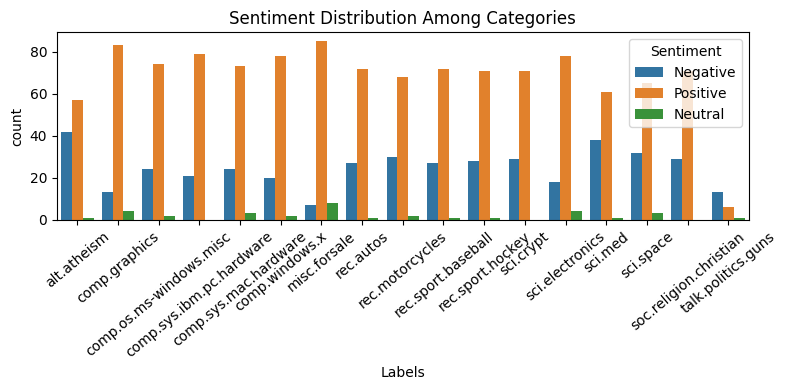

In [33]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='Labels', hue='Sentiment')
plt.xticks(rotation=40)
plt.title('Sentiment Distribution Among Categories')
plt.tight_layout()
plt.show()